# Time series analysis by Washim Ahmed

In [59]:
.libPaths("/home/washim/R/x86_64-pc-linux-gnu-library/3.4")
library(forecast)
library(repr)
options(repr.plot.width=8, repr.plot.height=4)

In [60]:
str(EuStockMarkets)

 Time-Series [1:1860, 1:4] from 1991 to 1999: 1629 1614 1607 1621 1618 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:4] "DAX" "SMI" "CAC" "FTSE"


### 1. Analyzing DAX

In [61]:
tsdata <- EuStockMarkets[,1]

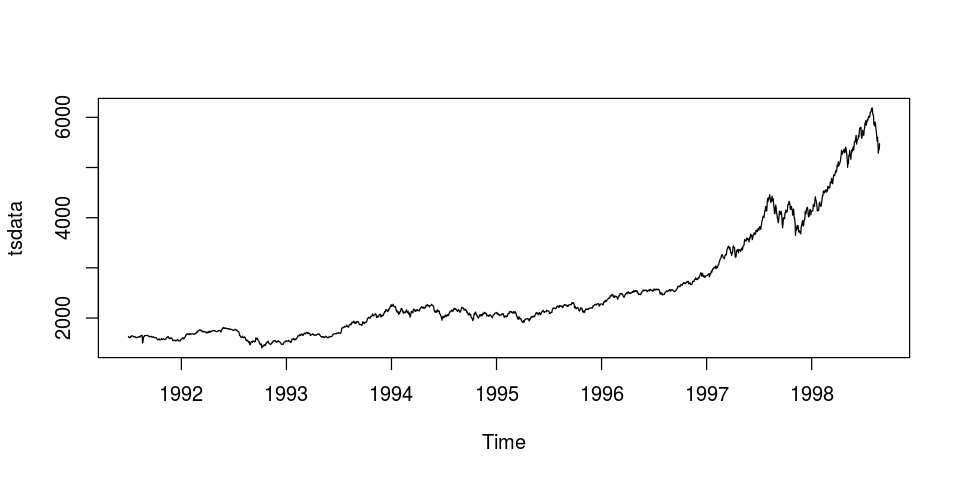

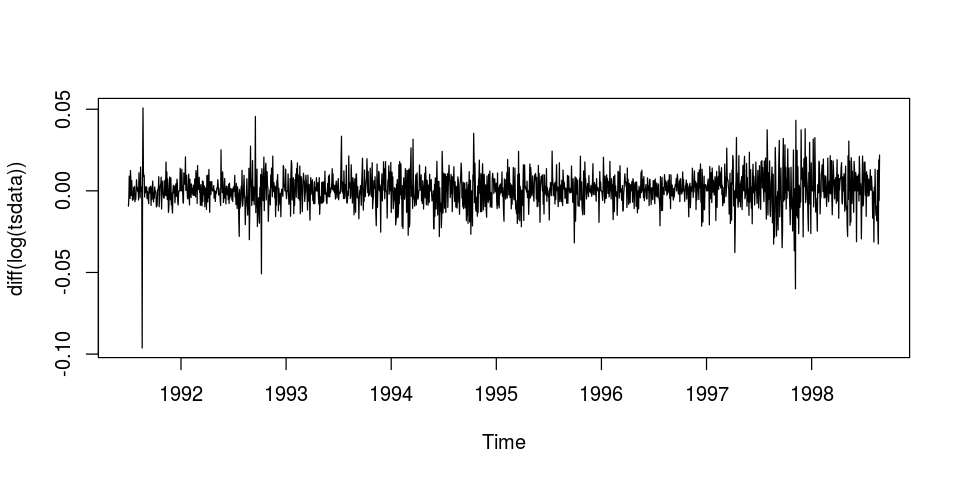

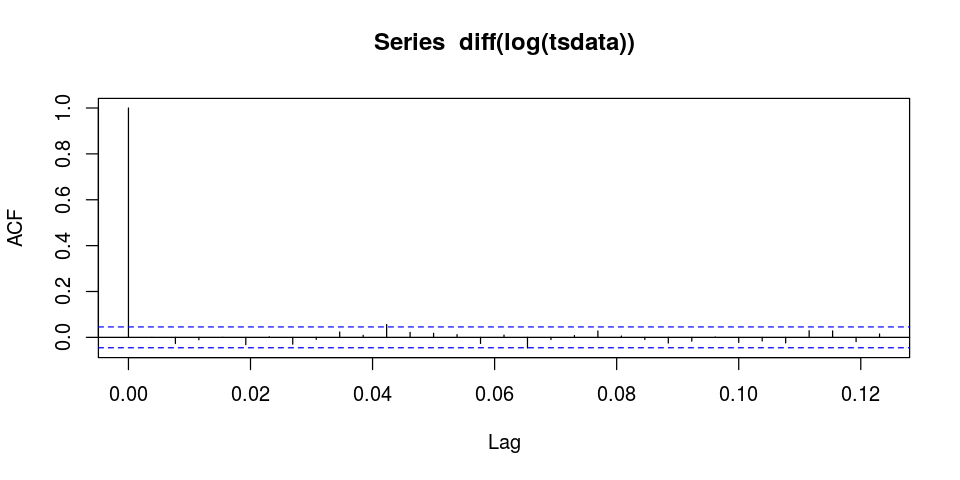

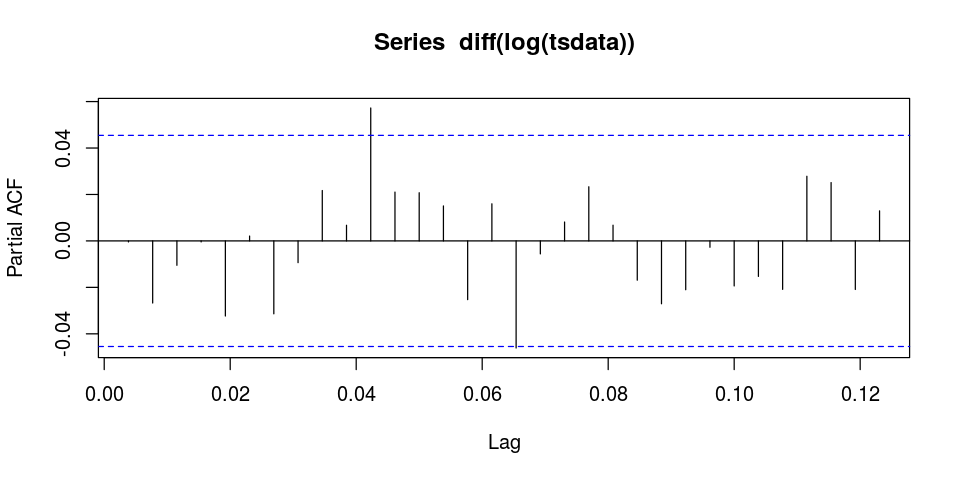

In [62]:
plot(tsdata)
plot(diff(log(tsdata)))
acf(diff(log(tsdata)))
pacf(diff(log(tsdata)))

### 1.1 Finalize Model for DAX
For me its a random walk series hence p,d,q is best for 0,1,0

### 1.2 Search best p,d,q to make sure ARIMA(0,1,0) with next 10 years forecasting

In [63]:
gridsearch <- function(dataset,range = 2){
    aic <- 0
    bic <- 0
    for (p in seq(0,range)) {
        for (d in seq(0,range)) {
            for (q in seq(0,range)) {
                tryCatch(
                    fit <- arima(log(tsdata),c(p,d,q)),
                    error=function(e) NA
                )
                if (AIC(fit) < aic && BIC(fit) < bic) {
                    best_p <- p
                    best_d <- d
                    best_q <- q
                    aic <- AIC(fit)
                    bic <- BIC(fit)
                }
            }
        }
    }
    print(paste("Best ARIMA(",best_p,",",best_d,",",best_q,") AIC=",aic," BIC=",bic, sep=""))
    best_fit <- arima(log(tsdata),c(best_p,best_d,best_q))
    plot(forecast(best_fit, 100))
}

[1] "Best ARIMA(0,1,0) AIC=-11727.770061275 BIC=-11722.2422672872"


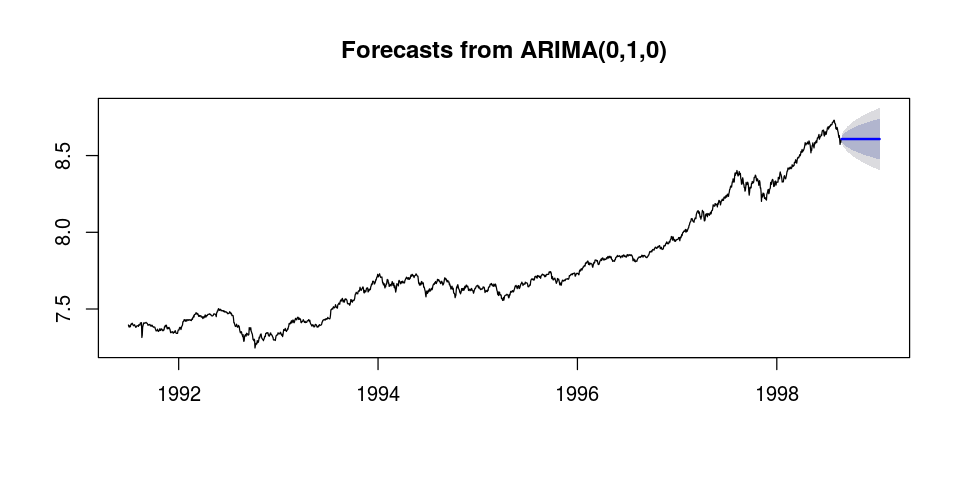

In [64]:
gridsearch(tsdata)

**So its confirm that for DAX best model is ARIMA(0,1,0)**

### 2. Analyzing SMI

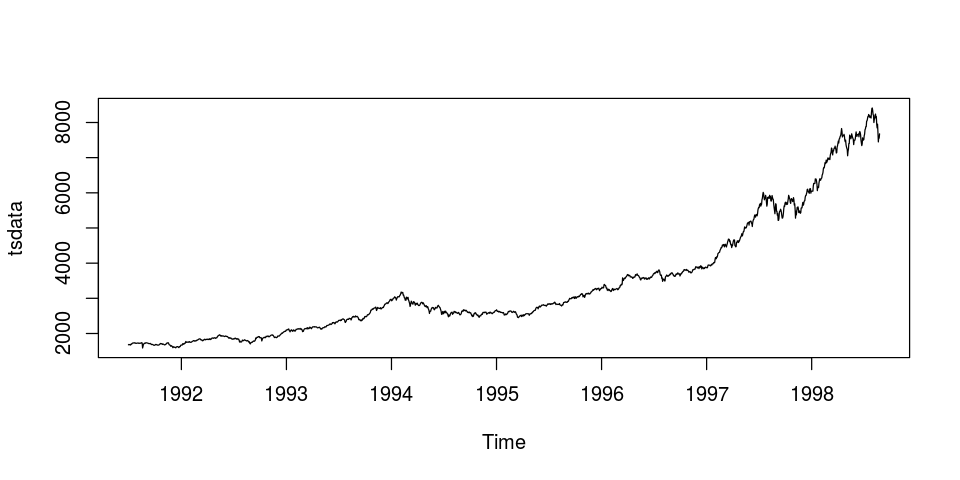

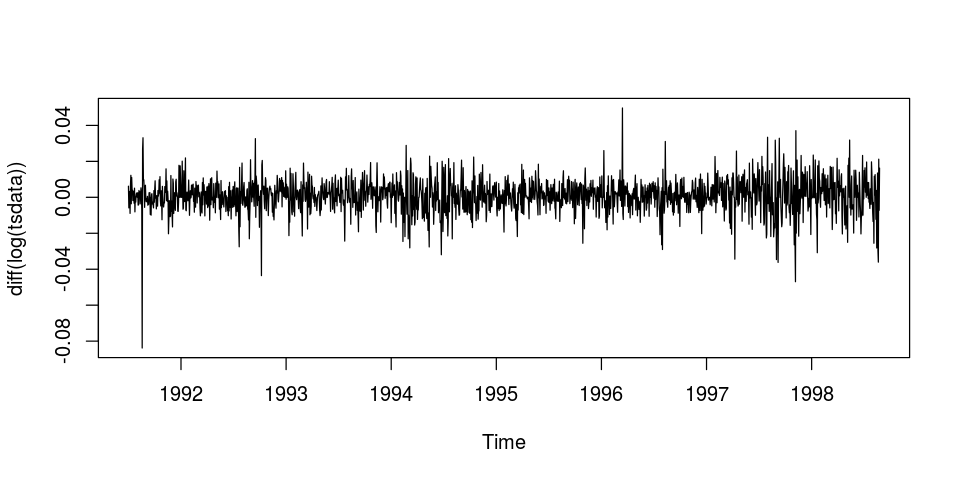

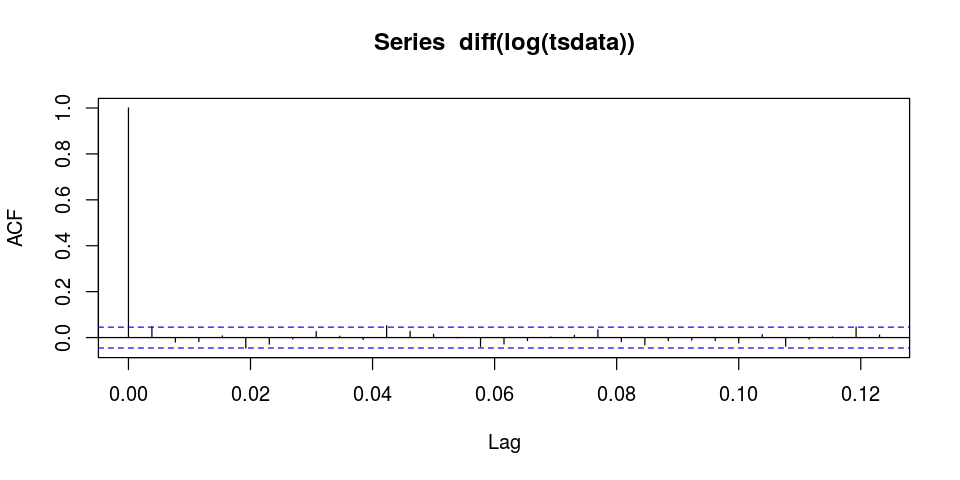

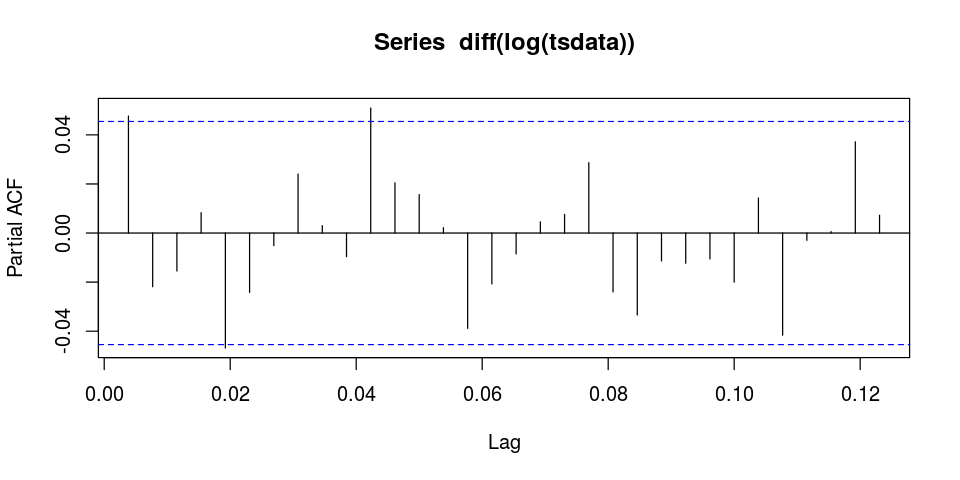

In [65]:
tsdata <- EuStockMarkets[,2]
plot(tsdata)
plot(diff(log(tsdata)))
acf(diff(log(tsdata)))
pacf(diff(log(tsdata)))

### 2.1 Finalize Model for SMI and next 10 years foreacsting
Best **ARIMA(0,1,0)** with AIC=-12120.7706026881 and BIC=-12115.2428087004

[1] "Best ARIMA(0,1,0) AIC=-12120.7706026881 BIC=-12115.2428087004"


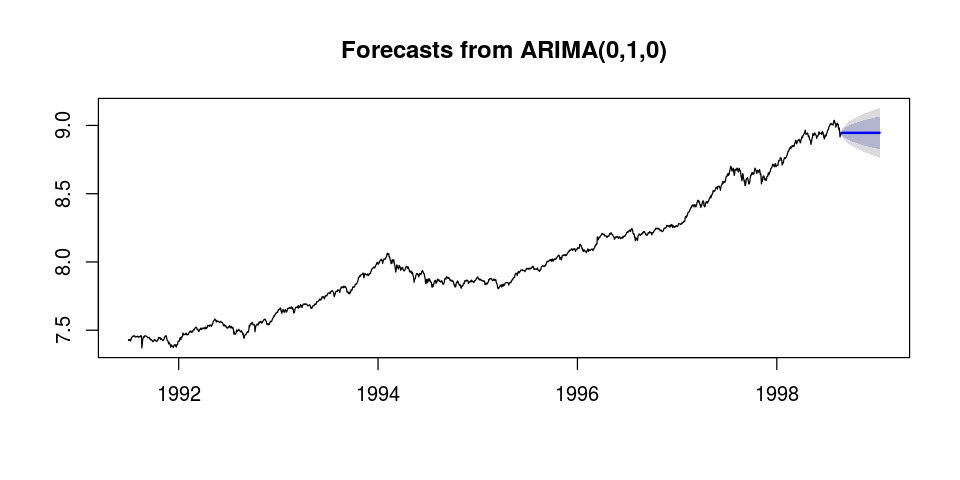

In [66]:
gridsearch(tsdata)

### 3. Analyzing CAC

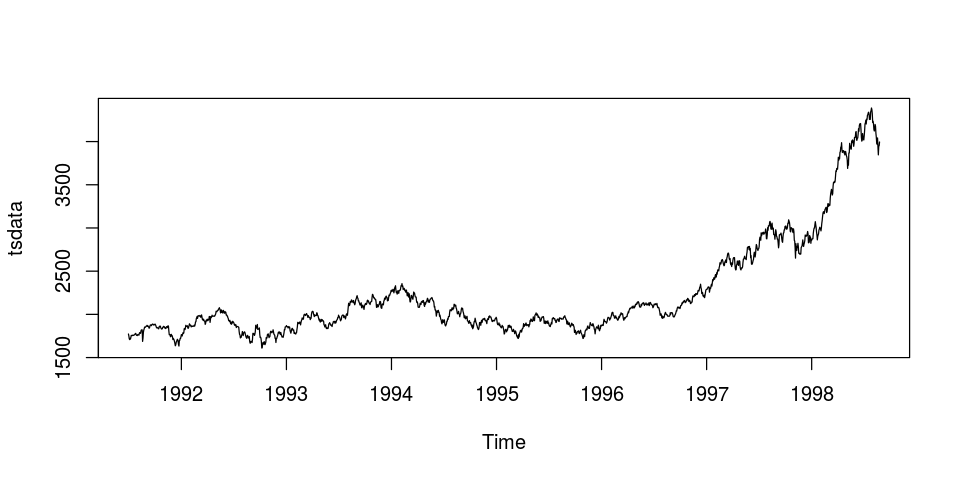

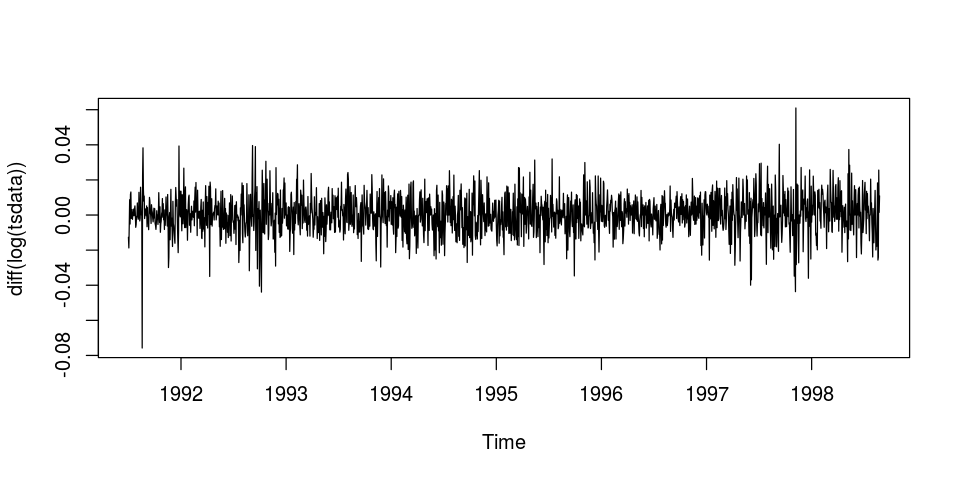

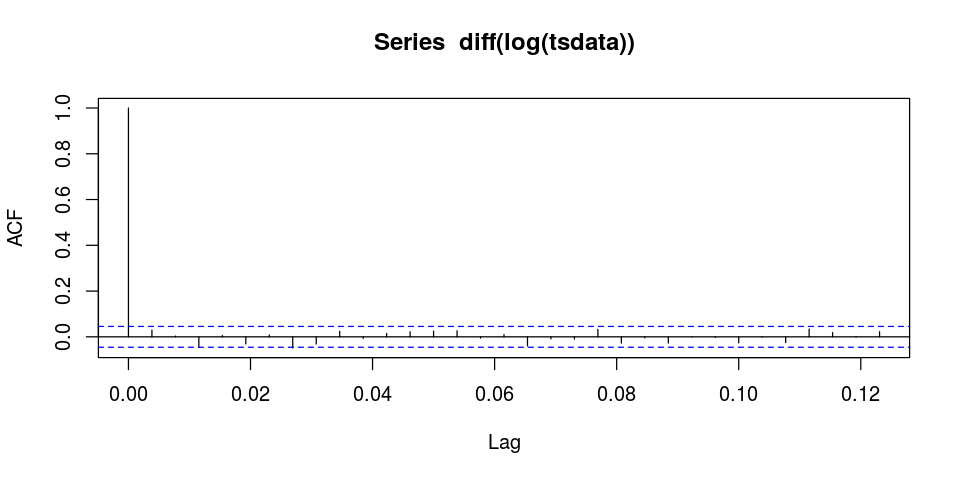

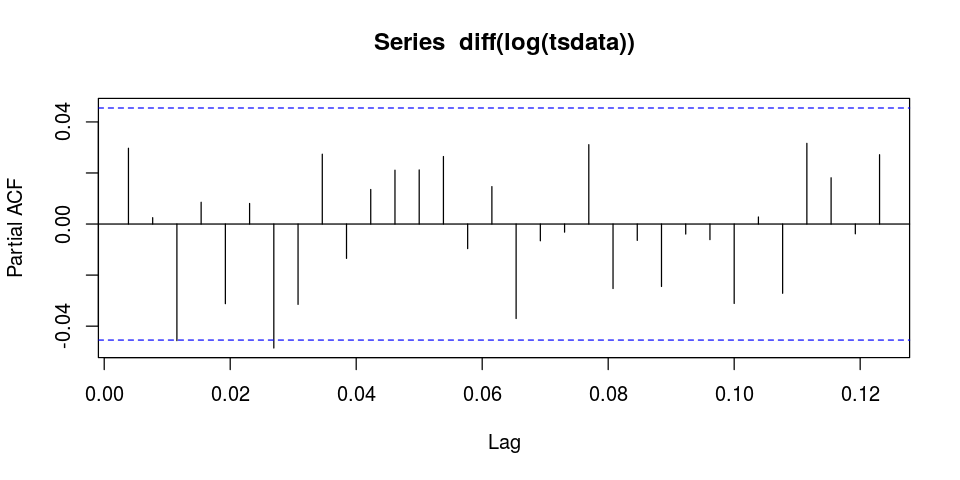

In [67]:
tsdata <- EuStockMarkets[,3]
plot(tsdata)
plot(diff(log(tsdata)))
acf(diff(log(tsdata)))
pacf(diff(log(tsdata)))

### 3.1 Finalize Model and next 10 years forecasting for CAC

[1] "Best ARIMA(0,1,0) AIC=-11477.7075873131 BIC=-11472.1797933254"


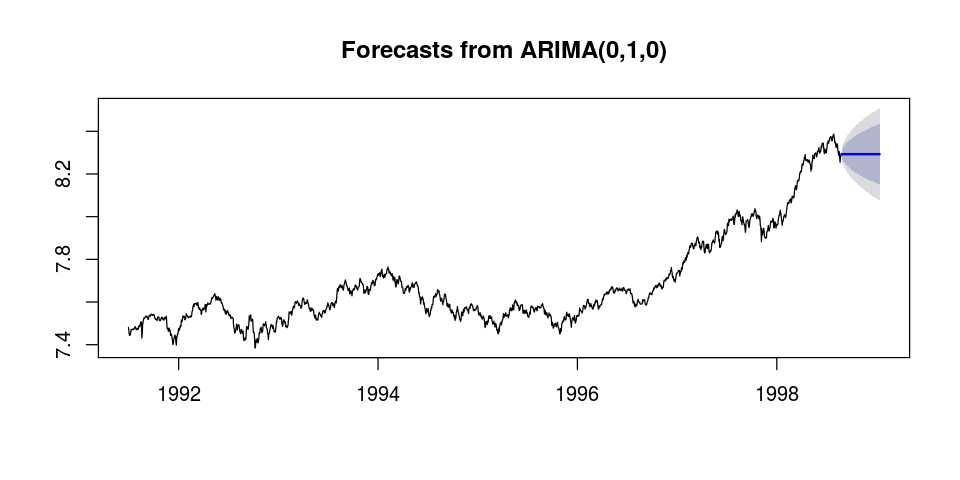

In [68]:
gridsearch(tsdata)

### 4. Analyzing FTSE

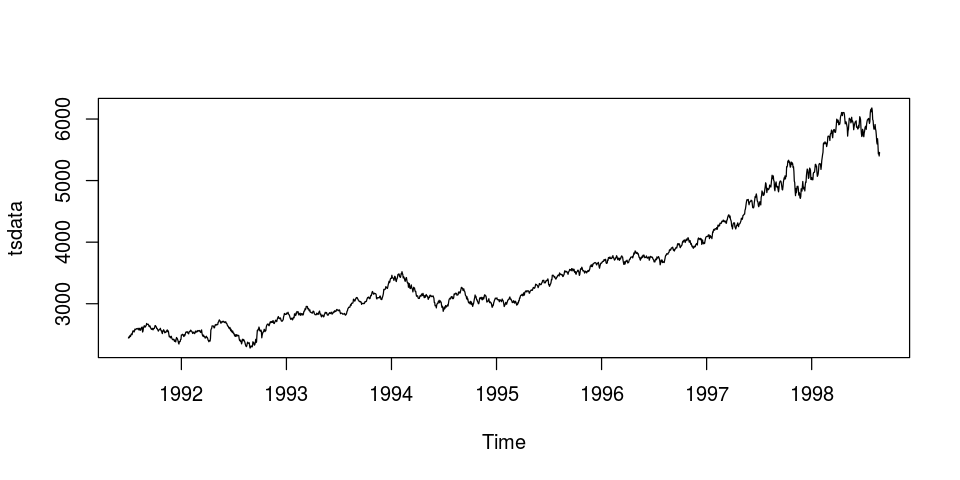

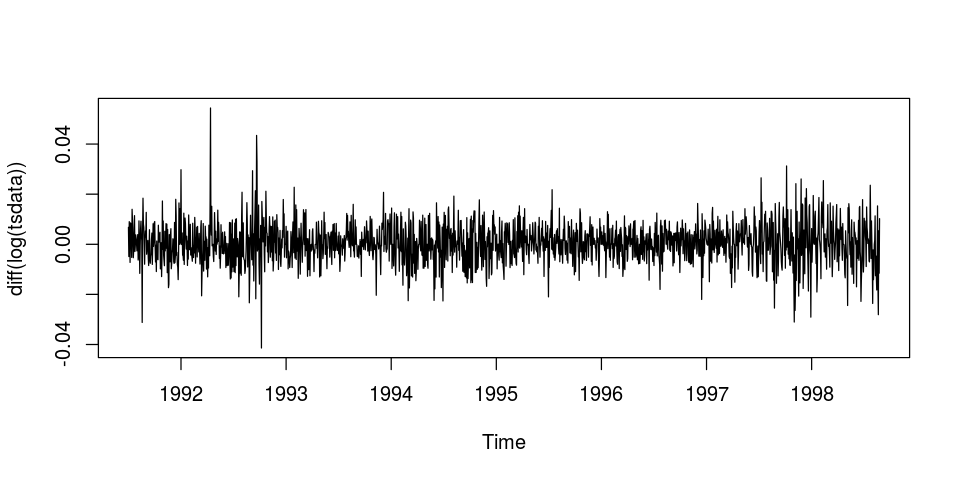

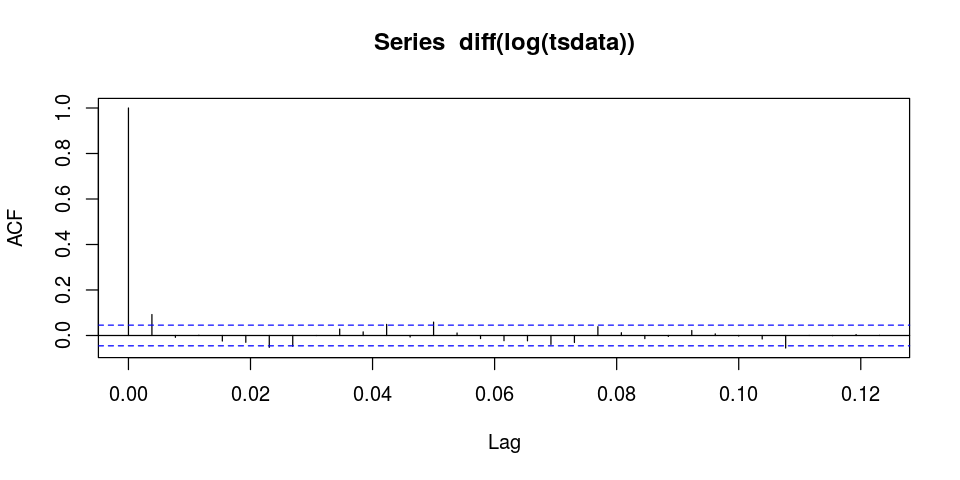

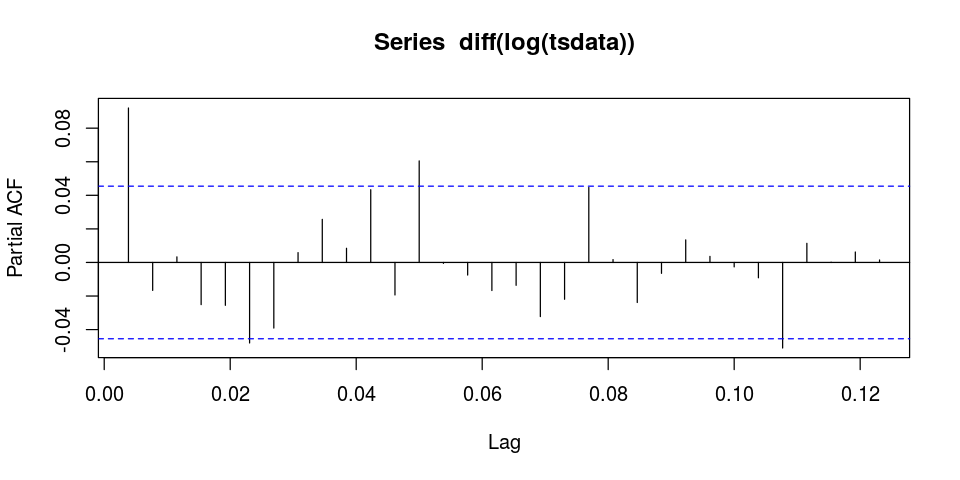

In [69]:
tsdata <- EuStockMarkets[,4]
plot(tsdata)
plot(diff(log(tsdata)))
acf(diff(log(tsdata)))
pacf(diff(log(tsdata)))

### 4.1 Finalize Model and next 10 years forecasting for FTSE

[1] "Best ARIMA(0,1,1) AIC=-12704.3751680134 BIC=-12693.3195800379"


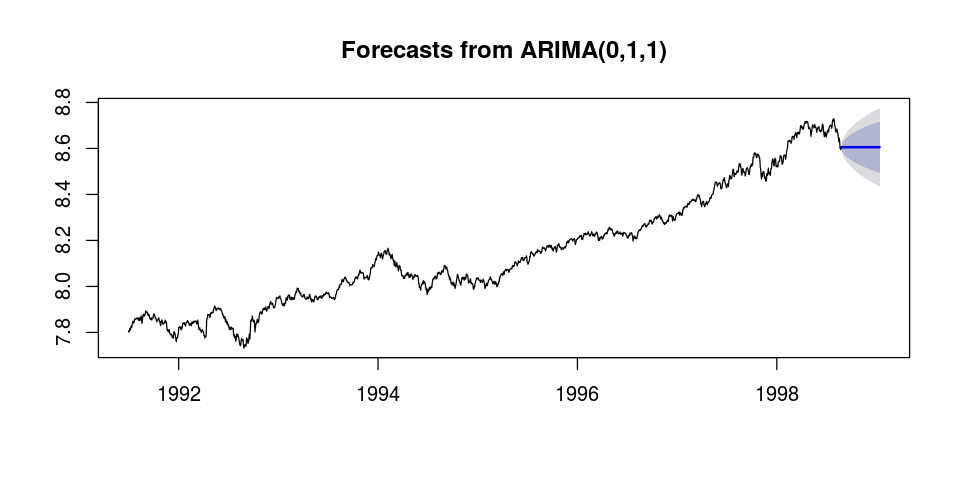

In [70]:
gridsearch(tsdata,3)

**Found FTSE is a MA model with above forecasting**